In [2]:
import re
import pandas as pd

In [3]:
f=open("WhatsApp Chat with 279 Winthrop ave.txt", "r", encoding="utf-8")

In [4]:
data=f.read()

In [5]:
print(data)

24/09/23, 14:37 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
20/07/23, 11:23 - Anusha Reddy UNH R created group "279 Winthrop ave"
24/09/23, 14:37 - Anusha Reddy UNH R added you
24/09/23, 14:37 - Anusha Reddy UNH R removed Yashwanth Replace
25/09/23, 10:35 - Sai SHU R: 10.84 each Wi-Fi
25/09/23, 10:35 - Sai SHU R: Everyone 

Ajax 3.97 
Toilet Paper 19.98 
Glam gloves 2.97 
Tax 1.71 

Water Filter 39.48 
Salt .64 
Tax 2.51 

Total 68.9 / 6  = 11.48 

BANANA 1.47 Sriram or Snehna (IDR)
Eggs 7.47 Sriram 
Eggs 6.50 Manaswini 


Mutton + Curd : 65.12 / 5 13.024
25/09/23, 10:36 - Sri Ram Varma UNH Roommate: Enti…?
25/09/23, 10:36 - Sai SHU R: Wi-Fi bill
25/09/23, 10:36 - Sri Ram Varma UNH Roommate: 8 already pay chesam ga
25/09/23, 10:36 - Sri Ram Varma UNH Roommate: Month starting lo
25/09/23, 10:37 - Sai SHU R: Adhi last month 25 di meru 8th ki pay cheshnar
25/09/23, 10:37 - Sai SHU R: Every mo

In [6]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [7]:
messages = re.split(pattern, data)[1:]
len(messages)

2047

In [8]:
dates = re.findall(pattern, data)
dates

['24/09/23, 14:37 - ',
 '20/07/23, 11:23 - ',
 '24/09/23, 14:37 - ',
 '24/09/23, 14:37 - ',
 '25/09/23, 10:35 - ',
 '25/09/23, 10:35 - ',
 '25/09/23, 10:36 - ',
 '25/09/23, 10:36 - ',
 '25/09/23, 10:36 - ',
 '25/09/23, 10:36 - ',
 '25/09/23, 10:37 - ',
 '25/09/23, 10:37 - ',
 '25/09/23, 10:37 - ',
 '25/09/23, 10:38 - ',
 '25/09/23, 10:38 - ',
 '25/09/23, 10:38 - ',
 '25/09/23, 10:39 - ',
 '25/09/23, 10:39 - ',
 '25/09/23, 10:39 - ',
 '25/09/23, 10:39 - ',
 '25/09/23, 10:40 - ',
 '25/09/23, 10:40 - ',
 '25/09/23, 10:40 - ',
 '25/09/23, 10:41 - ',
 '25/09/23, 10:41 - ',
 '25/09/23, 10:51 - ',
 '25/09/23, 10:53 - ',
 '25/09/23, 10:54 - ',
 '25/09/23, 10:55 - ',
 '25/09/23, 10:55 - ',
 '25/09/23, 10:55 - ',
 '25/09/23, 10:55 - ',
 '25/09/23, 10:55 - ',
 '25/09/23, 10:55 - ',
 '25/09/23, 10:55 - ',
 '25/09/23, 10:56 - ',
 '25/09/23, 11:05 - ',
 '25/09/23, 11:05 - ',
 '25/09/23, 11:05 - ',
 '25/09/23, 11:05 - ',
 '25/09/23, 11:06 - ',
 '25/09/23, 11:06 - ',
 '25/09/23, 11:07 - ',
 '25/09/23,

In [9]:
df = pd.DataFrame({'user_message': messages, 'message_date': dates})
# Remove trailing characters
df['message_date'] = df['message_date'].str.strip(" -")

# Convert to datetime with corrected format
df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%y, %H:%M')



df.head()

,user_message,message_date
0,Messages and calls are end-to-end encrypted. N...,2023-09-24 14:37:00
1,"Anusha Reddy UNH R created group ""279 Winthrop...",2023-07-20 11:23:00
2,Anusha Reddy UNH R added you\n,2023-09-24 14:37:00
3,Anusha Reddy UNH R removed Yashwanth Replace\n,2023-09-24 14:37:00
4,Sai SHU R: 10.84 each Wi-Fi\n,2023-09-25 10:35:00


In [10]:
df.rename(columns={'message_date': 'date'}, inplace=True)
df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2023-09-24 14:37:00
1,"Anusha Reddy UNH R created group ""279 Winthrop...",2023-07-20 11:23:00
2,Anusha Reddy UNH R added you\n,2023-09-24 14:37:00
3,Anusha Reddy UNH R removed Yashwanth Replace\n,2023-09-24 14:37:00
4,Sai SHU R: 10.84 each Wi-Fi\n,2023-09-25 10:35:00


In [11]:
df.shape

(2047, 2)

In [12]:
#separate users and messages
users = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]: #username
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('notification')
        messages.append(entry[0])

df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)
df.head()

,date,user,message
0,2023-09-24 14:37:00,notification,Messages and calls are end-to-end encrypted. N...
1,2023-07-20 11:23:00,notification,"Anusha Reddy UNH R created group ""279 Winthrop..."
2,2023-09-24 14:37:00,notification,Anusha Reddy UNH R added you\n
3,2023-09-24 14:37:00,notification,Anusha Reddy UNH R removed Yashwanth Replace\n
4,2023-09-25 10:35:00,Sai SHU R,10.84 each Wi-Fi\n


In [13]:
df['year'] = df['date'].dt.year
df.head()

,date,user,message,year
0,2023-09-24 14:37:00,notification,Messages and calls are end-to-end encrypted. N...,2023
1,2023-07-20 11:23:00,notification,"Anusha Reddy UNH R created group ""279 Winthrop...",2023
2,2023-09-24 14:37:00,notification,Anusha Reddy UNH R added you\n,2023
3,2023-09-24 14:37:00,notification,Anusha Reddy UNH R removed Yashwanth Replace\n,2023
4,2023-09-25 10:35:00,Sai SHU R,10.84 each Wi-Fi\n,2023


In [14]:
df['month'] = df['date'].dt.month_name()
df.head()

,date,user,message,year,month
0,2023-09-24 14:37:00,notification,Messages and calls are end-to-end encrypted. N...,2023,September
1,2023-07-20 11:23:00,notification,"Anusha Reddy UNH R created group ""279 Winthrop...",2023,July
2,2023-09-24 14:37:00,notification,Anusha Reddy UNH R added you\n,2023,September
3,2023-09-24 14:37:00,notification,Anusha Reddy UNH R removed Yashwanth Replace\n,2023,September
4,2023-09-25 10:35:00,Sai SHU R,10.84 each Wi-Fi\n,2023,September


In [15]:
df['day'] = df['date'].dt.day
df.head()

,date,user,message,year,month,day
0,2023-09-24 14:37:00,notification,Messages and calls are end-to-end encrypted. N...,2023,September,24
1,2023-07-20 11:23:00,notification,"Anusha Reddy UNH R created group ""279 Winthrop...",2023,July,20
2,2023-09-24 14:37:00,notification,Anusha Reddy UNH R added you\n,2023,September,24
3,2023-09-24 14:37:00,notification,Anusha Reddy UNH R removed Yashwanth Replace\n,2023,September,24
4,2023-09-25 10:35:00,Sai SHU R,10.84 each Wi-Fi\n,2023,September,25


In [16]:
df['hour'] = df['date'].dt.hour

In [17]:
df['minute'] = df['date'].dt.minute

In [18]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2023-09-24 14:37:00,notification,Messages and calls are end-to-end encrypted. N...,2023,September,24,14,37
1,2023-07-20 11:23:00,notification,"Anusha Reddy UNH R created group ""279 Winthrop...",2023,July,20,11,23
2,2023-09-24 14:37:00,notification,Anusha Reddy UNH R added you\n,2023,September,24,14,37
3,2023-09-24 14:37:00,notification,Anusha Reddy UNH R removed Yashwanth Replace\n,2023,September,24,14,37
4,2023-09-25 10:35:00,Sai SHU R,10.84 each Wi-Fi\n,2023,September,25,10,35


In [19]:
df[df['user'] == 'Shashank'].shape[0]

54

In [20]:
words=[]
for message in df['message']:
    words.extend(message.split())
len(words)

10894

In [21]:
from urlextract import URLExtract

extractor = URLExtract()
urls = extractor.find_urls("www.google.com, www.leetcode.com")
urls

ModuleNotFoundError: No module named 'urlextract'

In [22]:
links = []
for message in df["message"]:
    links.extend(extractor.find_urls(message))

len(links)

NameError: name 'extractor' is not defined

In [24]:
x = df['user'].value_counts().head()

In [26]:
import matplotlib.pyplot as plt

In [30]:
name = x.index
count = x.values

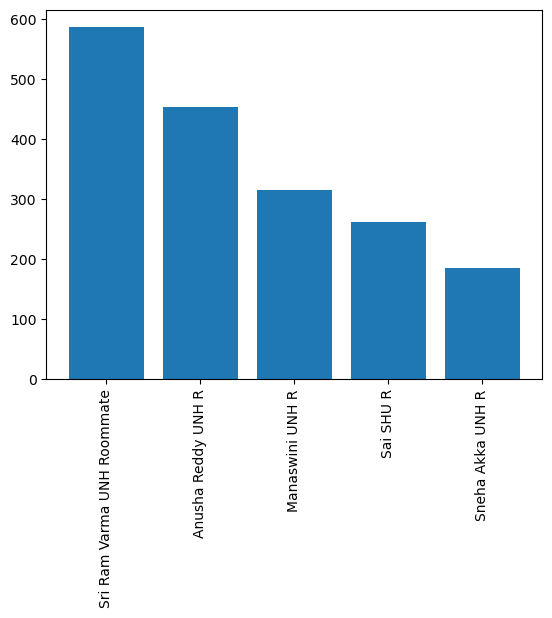

In [32]:
plt.bar(name, count)
plt.xticks(rotation='vertical')
plt.show()

In [34]:
temp = df[df['user'] != 'notification']
temp = temp[temp['message'] != '<Media omitted>\n']
temp

,date,user,message,year,month,day,hour,minute
4,2023-09-25 10:35:00,Sai SHU R,10.84 each Wi-Fi\n,2023,September,25,10,35
5,2023-09-25 10:35:00,Sai SHU R,,2023,September,25,10,35
6,2023-09-25 10:36:00,Sri Ram Varma UNH Roommate,Enti…?\n,2023,September,25,10,36
7,2023-09-25 10:36:00,Sai SHU R,Wi-Fi bill\n,2023,September,25,10,36
8,2023-09-25 10:36:00,Sri Ram Varma UNH Roommate,8 already pay chesam ga\n,2023,September,25,10,36
...,...,...,...,...,...,...,...,...
2040,2024-10-22 11:59:00,Kiran SHU R,Ajax-0.74 for 8ppl try to zell me.\n,2024,October,22,11,59
2041,2024-10-28 20:41:00,Shashank,Toilet paper- 2.65\n,2024,October,28,20,41
2042,2024-10-30 16:21:00,Shashank,You deleted this message\n,2024,October,30,16,21
2044,2024-11-02 17:42:00,Shashank,"Wifi - 24.8, toilet paper - 2.65, total 27.45\n",2024,November,2,17,42


In [36]:
f=open("stopwords.txt")
stopwords = f.read()

In [38]:
words=[]
for message in temp['message']:
    for word in message.lower().split():
        if word not in stopwords:
            words.append(word)
len(words)

5808

In [40]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,don’t,32
1,please,31
2,sneha,30
3,message,26
4,bill,23
5,time,23
6,send,23
7,anusha,22
8,kiran,20
9,wash,20


In [42]:
#remove group notification
#remove media omitted
#remove stop words

In [44]:
df['month_num'] = df['date'].dt.month

In [50]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num
0,2023-09-24 14:37:00,notification,Messages and calls are end-to-end encrypted. N...,2023,September,24,14,37,9
1,2023-07-20 11:23:00,notification,"Anusha Reddy UNH R created group ""279 Winthrop...",2023,July,20,11,23,7
2,2023-09-24 14:37:00,notification,Anusha Reddy UNH R added you\n,2023,September,24,14,37,9
3,2023-09-24 14:37:00,notification,Anusha Reddy UNH R removed Yashwanth Replace\n,2023,September,24,14,37,9
4,2023-09-25 10:35:00,Sai SHU R,10.84 each Wi-Fi\n,2023,September,25,10,35,9


In [76]:
timeline = df.groupby(['year', 'month_num', 'month']).count()['message'].reset_index()

In [78]:
timeline

,year,month_num,month,message
0,2023,7,July,1
1,2023,9,September,95
2,2023,10,October,245
3,2023,11,November,524
4,2023,12,December,540
5,2024,1,January,169
6,2024,2,February,9
7,2024,4,April,251
8,2024,5,May,1
9,2024,6,June,65


In [82]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i]+ "-" + str(timeline['year'][i]))

In [84]:
timeline['time'] = time

In [86]:
timeline.head()

,year,month_num,month,message,time
0,2023,7,July,1,July-2023
1,2023,9,September,95,September-2023
2,2023,10,October,245,October-2023
3,2023,11,November,524,November-2023
4,2023,12,December,540,December-2023


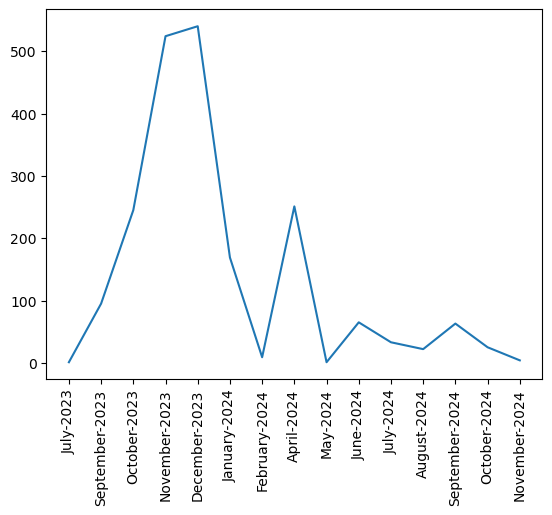

In [90]:
plt.plot(timeline['time'], timeline['message'])
plt.xticks(rotation="vertical")
plt.show()

In [94]:
df['only_date'] = df['date'].dt.date

In [98]:
daily_timeline = df.groupby('only_date').count()['message'].reset_index()

In [102]:
daily_timeline

,only_date,message
0,2023-07-20,1
1,2023-09-24,3
2,2023-09-25,68
3,2023-09-26,1
4,2023-09-29,6
...,...,...
171,2024-10-20,2
172,2024-10-22,1
173,2024-10-28,1
174,2024-10-30,1


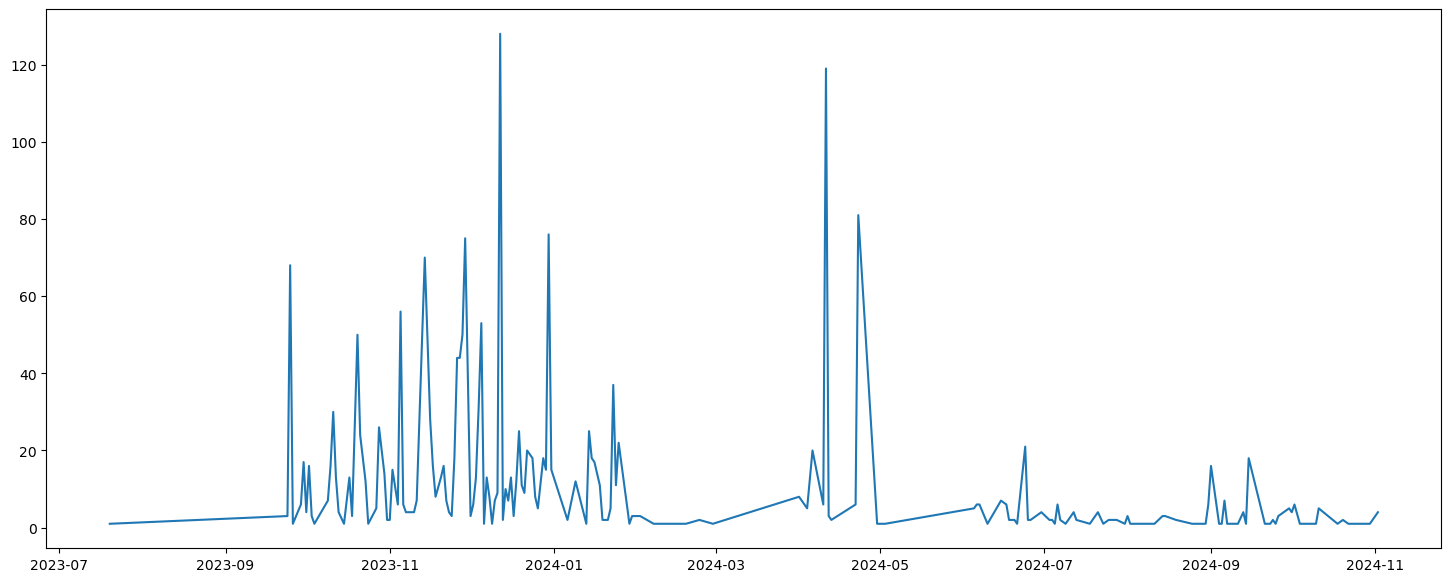

In [106]:
plt.figure(figsize=(18,7))
plt.plot(daily_timeline['only_date'], daily_timeline['message'])

In [110]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num,only_date
0,2023-09-24 14:37:00,notification,Messages and calls are end-to-end encrypted. N...,2023,September,24,14,37,9,2023-09-24
1,2023-07-20 11:23:00,notification,"Anusha Reddy UNH R created group ""279 Winthrop...",2023,July,20,11,23,7,2023-07-20
2,2023-09-24 14:37:00,notification,Anusha Reddy UNH R added you\n,2023,September,24,14,37,9,2023-09-24
3,2023-09-24 14:37:00,notification,Anusha Reddy UNH R removed Yashwanth Replace\n,2023,September,24,14,37,9,2023-09-24
4,2023-09-25 10:35:00,Sai SHU R,10.84 each Wi-Fi\n,2023,September,25,10,35,9,2023-09-25


In [112]:
df['day_name'] = df['date'].dt.day_name()

In [114]:
df['day_name'].value_counts()

day_name
Tuesday      551
Monday       317
Thursday     293
Sunday       270
Saturday     258
Friday       185
Wednesday    173
Name: count, dtype: int64

In [116]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name
0,2023-09-24 14:37:00,notification,Messages and calls are end-to-end encrypted. N...,2023,September,24,14,37,9,2023-09-24,Sunday
1,2023-07-20 11:23:00,notification,"Anusha Reddy UNH R created group ""279 Winthrop...",2023,July,20,11,23,7,2023-07-20,Thursday
2,2023-09-24 14:37:00,notification,Anusha Reddy UNH R added you\n,2023,September,24,14,37,9,2023-09-24,Sunday
3,2023-09-24 14:37:00,notification,Anusha Reddy UNH R removed Yashwanth Replace\n,2023,September,24,14,37,9,2023-09-24,Sunday
4,2023-09-25 10:35:00,Sai SHU R,10.84 each Wi-Fi\n,2023,September,25,10,35,9,2023-09-25,Monday


In [120]:
period=[]
for hour in df[['day_name', 'hour']]['hour']:
    if hour==23:
        period.append(str(hour) + "-" + str("00"))
    elif hour==0:
        period.append(str("00") + "-" + str(hour+1))
    else:
        period.append(str(hour) + "-" + str(hour+1))

In [124]:
df['period'] = period

In [128]:
df.sample(5)

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name,period
1216,2023-12-20 09:23:00,Sri Ram Varma UNH Roommate,Seriously ala Ela chestharu assalu commode mid...,2023,December,20,9,23,12,2023-12-20,Wednesday,9-10
736,2023-11-27 18:36:00,Sri Ram Varma UNH Roommate,Group ga techinavi single ga use cheyakandi li...,2023,November,27,18,36,11,2023-11-27,Monday,18-19
2013,2024-09-30 11:51:00,Sneha Akka UNH R,Rent avaru kaduthunnaru ...nen eroju evng esth...,2024,September,30,11,51,9,2024-09-30,Monday,11-12
272,2023-10-21 18:37:00,Sai SHU R,Nak Koncham chalu\n,2023,October,21,18,37,10,2023-10-21,Saturday,18-19
155,2023-10-11 08:35:00,Manaswini UNH R,😂\n,2023,October,11,8,35,10,2023-10-11,Wednesday,8-9


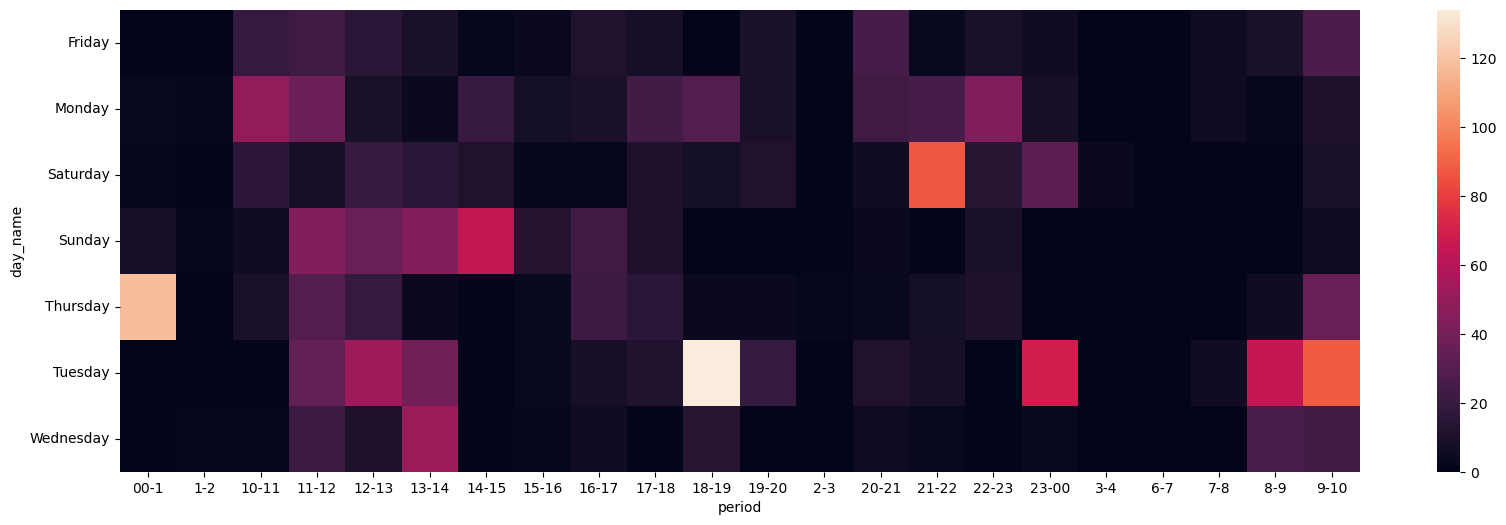

In [130]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name', columns='period', values='message', aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')
plt.show()